### TASK A: Top 100 word & Zipf's Law

In [2]:
import pandas as pd

# Load the models and brands mapping
mapping_df = pd.read_csv('car_models_and_brands.csv')

# Load the data from Data Scrapper Code
data_df = pd.read_csv('oldposts_data.csv')

# Create a dictionary for mapping models to brands
model_to_brand = {}
for _, row in mapping_df.iterrows():
    brand = row['Brand']
    models = row['Model'].split('|')
    for model in models:
        model_to_brand[model] = brand

model_to_brand['330i'] = 'bmw'
model_to_brand['325i'] = 'bmw'
model_to_brand['rx'] = 'lexus'
model_to_brand['ls'] = 'lexus'
model_to_brand['gs'] = 'lexus'
model_to_brand['es'] = 'lexus'
model_to_brand['g35'] = 'infiniti'

del model_to_brand['mercedes']

model_to_brand['volkswagen'] = model_to_brand.pop('volkwagen')

brand_fil = list(set(model_to_brand.values()))

# model_to_brand['s4'] = 'audi'
# model_to_brand['tlx'] = 'acura'
# model_to_brand['daytona'] = 'dodge'
# model_to_brand['wrangler'] = 'jeep'

In [3]:
rem_brand = ["car","seat","sedan","problem"]

brand_fil = [word for word in brand_fil if word not in rem_brand]
print(brand_fil)
data_df

['lincoln', 'toyata', 'chevrolet', 'mitsubishi', 'kia.', 'mercedes', 'chrysler', 'hyndai kia', 'dodge', 'nissan.', 'hyundai', 'buick', 'acura', 'suzuki', 'hyundai,', 'volkswagen', 'saturn', 'volkwagen', 'hyundai.', 'volvo', 'audi', 'kia', 'infiniti', 'mercury', 'toyota', 'nissan', 'mazda', 'honda', 'pontiac', 'lexus', 'ford', 'cadillac', 'bmw', 'subaru']


,Unnamed: 0,User_ID,Date,Comment
0,0,merc1,Mar-02,I personally think that with a few tweaks the ...
1,1,fredvh,Mar-02,I am debating a new purchase and these two are...
2,2,blueguydotcom,Mar-02,"Great handling, RWD, excellent engine and the ..."
3,3,hungrywhale,Mar-02,And no manual tranny. That may not matter to y...
4,4,riez,Mar-02,One beauty of BMW 3 Series is that there are s...
...,...,...,...,...
5980,5980,brightness04,Oct-06,"When I bought in 1988, fixed mortgage rates we..."
5981,5981,qbrozen,Oct-06,You won't get an argument from me.\n\nI'd neve...
5982,5982,qbrozen,Oct-06,"As Rocky point out, this is about SEDANS. Last..."
5983,5983,rockylee,Oct-06,"Rocky, I don't know how you get these ridiculo..."


In [4]:
data_df = data_df.drop(columns='Unnamed: 0')

In [5]:
data_df.head()

,User_ID,Date,Comment
0,merc1,Mar-02,I personally think that with a few tweaks the ...
1,fredvh,Mar-02,I am debating a new purchase and these two are...
2,blueguydotcom,Mar-02,"Great handling, RWD, excellent engine and the ..."
3,hungrywhale,Mar-02,And no manual tranny. That may not matter to y...
4,riez,Mar-02,One beauty of BMW 3 Series is that there are s...


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Extract the comment column
comments = data_df[data_df['Comment'].apply(lambda x: isinstance(x, str))]['Comment']

# Tokenize and preprocess the comments (remove punctuation and convert to lowercase)
def preprocesstext(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    return list(set(words))

# Tokenize and preprocess the comments
all_words = []
for comment in comments:
    words = preprocesstext(comment)
    all_words.extend(words)

# Calculate word frequencies
word_frequencies = pd.Series(all_words).value_counts()

In [7]:
print(word_frequencies)

the            5160
a              4385
and            4155
to             4127
i              3961
               ... 
killers           1
s03s              1
6466              1
tiring            1
unpractical       1
Length: 22936, dtype: int64


<Axes: xlabel='Log Rank', ylabel='Log of Word Frequency'>

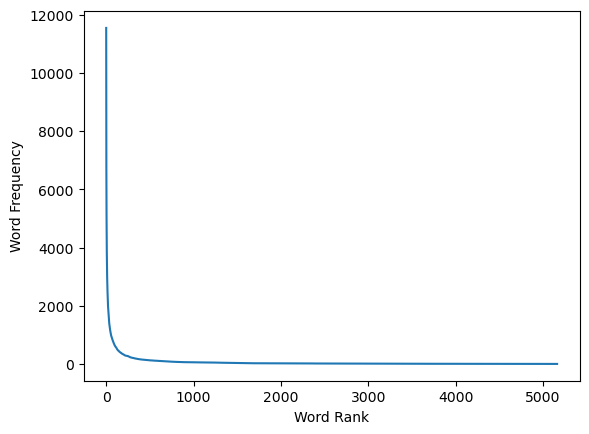

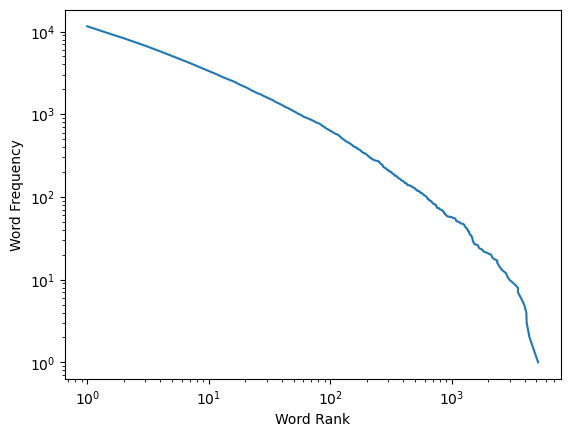

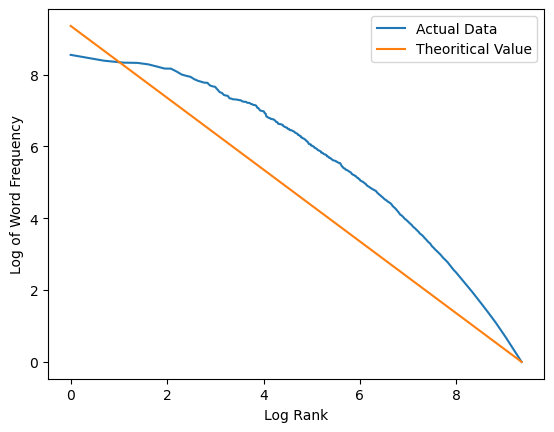

In [99]:
# Calculate word frequencies
word_frequencies = pd.Series(all_words).value_counts()


# Rank words by frequency
ranks = []
count = 1
for i in range(len(word_frequencies)):
    if (word_frequencies[i] == word_frequencies[i-1]) and i!= 0:
        ranks.append(ranks[i-1])
        count = count + 1
    elif word_frequencies[i] != word_frequencies[i-1] and i!= 0:
        ranks.append(ranks[i-1]+ count)
        count = 1
    else:
        ranks.append(count)

# Calculate the theoretical prediction for Zipf's Law
#total_words = len(all_words)
#theoretical_freq = total_words / ranks
zipf_const = ranks[-1] * word_frequencies[-1]
zipf_const
theoretical_freq = zipf_const / ranks

df_zipf = pd.DataFrame(ranks, word_frequencies.tolist())
df_zipf.plot(xlabel='Word Rank',ylabel='Word Frequency', legend=False)
df_zipf.plot(xlabel='Word Rank',ylabel='Word Frequency',logx=True,logy=True, legend=False)

df_zipf_log = pd.DataFrame({'Log Rank': np.log(ranks), 'Log Frequency': np.log(word_frequencies)})
ax = df_zipf_log.plot(x='Log Rank', y='Log Frequency', label='Actual Data', xlabel='Log of Word Rank', ylabel='Log of Word Frequency')

df_zipf_ideal = pd.DataFrame({'Log Rank': np.log(ranks), 'Log Zipf': np.log(zipf_const) - np.log(ranks)})
df_zipf_ideal.plot(x='Log Rank', y='Log Zipf', ax=ax, label='Theoritical Value')


## Empirically testing Zipf's law ##

In [86]:
#Test empirically using regression

df_zipf_reg = pd.DataFrame({'Y': np.log(ranks), 'X': np.log(word_frequencies/zipf_const)})

import statsmodels.api as sm
model = sm.OLS(df_zipf_reg['Y'], df_zipf_reg['X']).fit()
print("\nStandard Error:\n", model.bse)
print(model.summary())


Standard Error:
 X    0.000448
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          5.383e+06
Date:                Sat, 09 Sep 2023   Prob (F-statistic):                        0.00
Time:                        00:42:42   Log-Likelihood:                         -19910.
No. Observations:               22936   AIC:                                  3.982e+04
Df Residuals:                   22935   BIC:                                  3.983e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0

From the results of regression above for $\log{r} = \theta\log{\frac{f}{f_nr_n}} + \epsilon$, we can say that $\theta \approx -1$ with more than 99.99% confidence interval.<br> The $R^2$ value for this model is 0.996, which means that large amount of the variability is captured and the model fits well to this data.<br> P-value of 0 implies that $\theta$ is statistically significantly different than 0 (null hypothesis that $\theta = 0$)

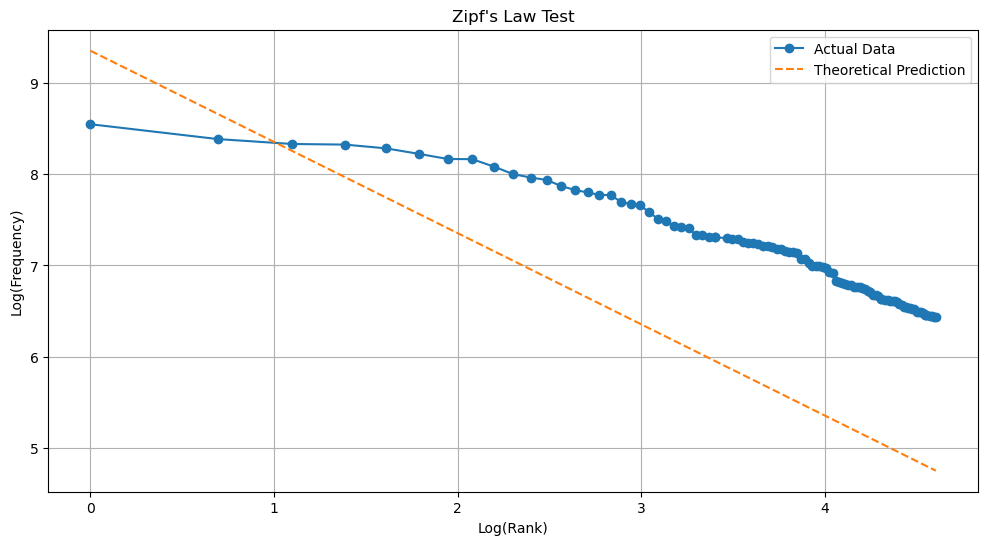

In [100]:
# Plot the most common 100 words and the theoretical prediction
#top_100_words = word_frequencies.head(100)
#top_100_ranks = np.arange(1, 101)  # Adjust the ranks to match the top 100 words
plt.figure(figsize=(12, 6))
plt.plot(np.log(ranks[:100]), np.log(word_frequencies.head(100)), marker='o', label='Actual Data')
plt.plot(np.log(ranks[:100]), np.log(theoretical_freq[:100]), linestyle='--', label='Theoretical Prediction')
plt.title("Zipf's Law Test")
plt.xlabel("Log(Rank)")
plt.ylabel("Log(Frequency)")
plt.legend()
plt.grid(True)
plt.show()

### TASK B: Word frequency table after removing stop words

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (you only need to do this once)
nltk.download('stopwords')

# Extract the comment column
comments = data_df[data_df['Comment'].apply(lambda x: isinstance(x, str))]['Comment']

# Get the NLTK English stop words
stop_words = set(stopwords.words('english'))

# Tokenize and preprocess the comments (remove punctuation, convert to lowercase, and remove stop words)
def preprocesstext(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = re.findall(r'\b\w+\b', text.lower())  # Tokenize and convert to lowercase
    nswords = [word for word in words if word not in stop_words]
    nswords = [model_to_brand.get(word, word) for word in nswords]
    return list(set(nswords))

# Tokenize and preprocess the comments, removing stop words
words_nostop = []
for comment in comments:
    words = preprocesstext(comment)
    words_nostop.extend(words)

# Calculate word frequencies
words_nostop_freq = pd.Series(words_nostop).value_counts()

wnf_df = pd.DataFrame(words_nostop_freq)
wnf_df = wnf_df.reset_index()
wnf_df = wnf_df.rename(columns={'index': 'words', 0: 'frequency'})

[nltk_data] Downloading package stopwords to /Users/mansi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/var/folders/_7/f6n3lsw53wj5tt_8skbqmzmh0000gn/T/ipykernel_79682/2062774763.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_bd_df['words'] = top_bd_df['words'].replace(key_b)


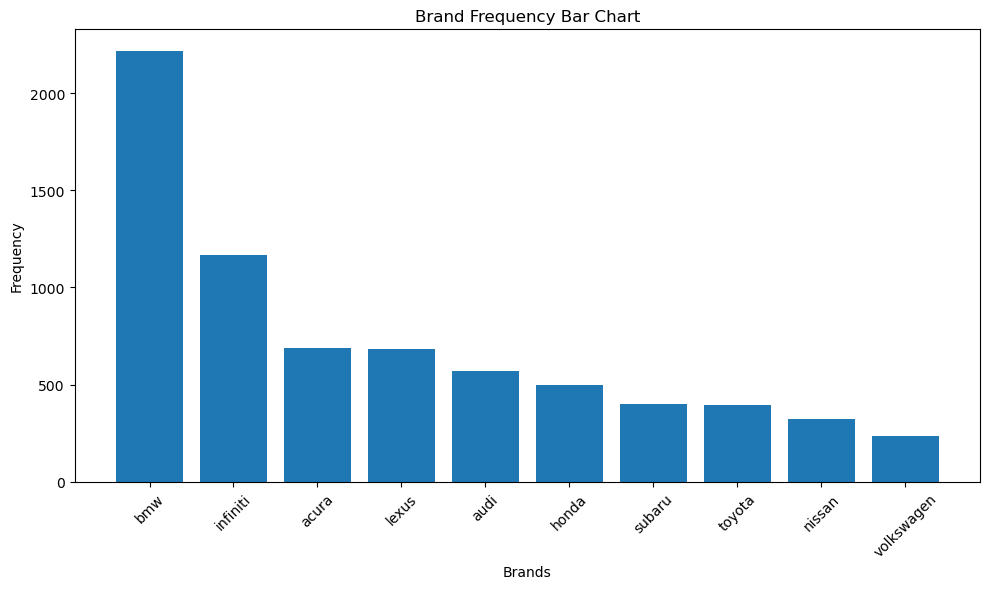

In [10]:
top_bd_df = wnf_df[wnf_df['words'].isin(brand_fil)]
key_b = {"volkwagen":"volkswagen", "mercedes-benz":"mercedes"}
top_bd_df['words'] = top_bd_df['words'].replace(key_b)
top_bd_df_f = top_bd_df.groupby("words").sum().reset_index().sort_values(by='frequency',ascending=False)


plt.figure(figsize=(10, 6))
plt.bar(top_bd_df_f['words'].head(10), top_bd_df_f['frequency'].head(10))
plt.xlabel('Brands')
plt.ylabel('Frequency')
plt.title('Brand Frequency Bar Chart')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [11]:
top_10_df = top_bd_df_f.head(10)
top_10_df

,words,frequency
2,bmw,2217
12,infiniti,1167
0,acura,688
14,lexus,685
1,audi,568
9,honda,496
23,subaru,403
25,toyota,397
20,nissan,322
26,volkswagen,238


### TASK C: LIFT Analysis

In [12]:
token_df = pd.DataFrame(comments)
token_df['Tokenized_Message'] = token_df['Comment'].map(preprocesstext)

def replace_words_in_list(word_list, replacements):
    ls = [replacements.get(word, word) for word in word_list]
    return list(set(ls))

token_df['Mapped_words'] = token_df['Tokenized_Message'].apply(lambda x: replace_words_in_list(x, model_to_brand))


In [13]:
word_distance = 15

def distance_thresh(words_list, word1, word2, max_distance):
    indices_word1 = [i for i, word in enumerate(words_list) if word == word1]
    indices_word2 = [i for i, word in enumerate(words_list) if word == word2]
    for idx1 in indices_word1:
        for idx2 in indices_word2:
            if abs(idx1 - idx2) <= max_distance:
                return True
    return False

def lift_analysis(data,word_A,word_B,max_distance):
    if (word_A == word_B):
        return '-'
    else:
        N = data.shape[0]
        N_A = sum(1 for review in data if word_A in review)
        N_B = sum(1 for review in data if word_B in review)
        N_A_and_B = sum(1 for review in data if distance_thresh(review, word_A, word_B, max_distance) and word_A in review and word_B in review)
    
        lift = (N * N_A_and_B) / (N_A * N_B)

        return np.round(lift,4)

df_lift = []

for index, brand1 in top_10_df.iterrows():
    for index,brand2 in top_10_df.iterrows():
        df_lift.append(lift_analysis(token_df['Mapped_words'],brand1['words'],brand2['words'],word_distance))


In [14]:
import numpy as np
lift_np = np.reshape(df_lift,(10,10))
lift_df = pd.DataFrame(data= lift_np)
for i in range(10):
    lift_df = lift_df.rename(columns = {i: top_10_df.iloc[i, 0]})
    lift_df = lift_df.rename(index = {i: top_10_df.iloc[i, 0]})
lift_df


,bmw,infiniti,acura,lexus,audi,honda,subaru,toyota,nissan,volkswagen
bmw,-,0.9114,0.0471,0.7291,0.6606,0.0599,0.2679,0.0952,0.1509,0.4952
infiniti,0.9114,-,0.8349,0.1423,0.1716,0.6928,0.2927,0.5942,0.6849,1.5173
acura,0.0471,0.8349,-,1.5747,1.1793,2.3151,1.1441,1.5996,1.0806,1.1324
lexus,0.7291,0.1423,1.5747,-,2.092,0.4756,0.1518,1.3425,0.2713,0.1551
audi,0.6606,0.1716,1.1793,2.092,-,0.5099,0.183,0.5574,0.2945,0.6858
honda,0.0599,0.6928,2.3151,0.4756,0.5099,-,0.539,4.0728,2.4733,1.2852
subaru,0.2679,0.2927,1.1441,0.1518,0.183,0.539,-,0.6734,1.2914,0.4394
toyota,0.0952,0.5942,1.5996,1.3425,0.5574,4.0728,0.6734,-,2.9027,1.0705
nissan,0.1509,0.6849,1.0806,0.2713,0.2945,2.4733,1.2914,2.9027,-,0.7699
volkswagen,0.4952,1.5173,1.1324,0.1551,0.6858,1.2852,0.4394,1.0705,0.7699,-


### Task D: MDS Plot

In [15]:
lift_df = lift_df.replace(to_replace='-',value=1)
lift_df = lift_df.astype(float)
lift_df

,bmw,infiniti,acura,lexus,audi,honda,subaru,toyota,nissan,volkswagen
bmw,1.0000,0.9114,0.0471,0.7291,0.6606,0.0599,0.2679,0.0952,0.1509,0.4952
infiniti,0.9114,1.0000,0.8349,0.1423,0.1716,0.6928,0.2927,0.5942,0.6849,1.5173
acura,0.0471,0.8349,1.0000,1.5747,1.1793,2.3151,1.1441,1.5996,1.0806,1.1324
lexus,0.7291,0.1423,1.5747,1.0000,2.0920,0.4756,0.1518,1.3425,0.2713,0.1551
audi,0.6606,0.1716,1.1793,2.0920,1.0000,0.5099,0.1830,0.5574,0.2945,0.6858
honda,0.0599,0.6928,2.3151,0.4756,0.5099,1.0000,0.5390,4.0728,2.4733,1.2852
subaru,0.2679,0.2927,1.1441,0.1518,0.1830,0.5390,1.0000,0.6734,1.2914,0.4394
toyota,0.0952,0.5942,1.5996,1.3425,0.5574,4.0728,0.6734,1.0000,2.9027,1.0705
nissan,0.1509,0.6849,1.0806,0.2713,0.2945,2.4733,1.2914,2.9027,1.0000,0.7699
volkswagen,0.4952,1.5173,1.1324,0.1551,0.6858,1.2852,0.4394,1.0705,0.7699,1.0000


In [16]:
from sklearn.manifold import MDS

def invert_value(x):
    if x == 0:
        return np.NaN
    return 1/x

lift_df_inv = lift_df.applymap(invert_value)

lift_df_inv = lift_df_inv.replace(to_replace=np.NaN,value=200)

for i in range(len(lift_df_inv)):
    for j in range(len(lift_df_inv)):
            lift_df_inv.iloc[i, j] = lift_df_inv.iloc[i, j] ** 0.2  ## Scaled values to get better MDS distances


lift_df_inv

,bmw,infiniti,acura,lexus,audi,honda,subaru,toyota,nissan,volkswagen
bmw,1.000000,1.018728,1.842450,1.065228,1.086456,1.755960,1.301384,1.600562,1.459695,1.150917
infiniti,1.018728,1.000000,1.036748,1.476927,1.422645,1.076164,1.278543,1.109720,1.078635,0.919996
acura,1.842450,1.036748,1.000000,0.913189,0.967554,0.845446,0.973436,0.910328,0.984616,0.975439
lexus,1.065228,1.476927,0.913189,1.000000,0.862755,1.160250,1.457960,0.942795,1.298106,1.451703
audi,1.086456,1.422645,0.967554,0.862755,1.000000,1.144203,1.404461,1.124001,1.276977,1.078352
honda,1.755960,1.076164,0.845446,1.160250,1.144203,1.000000,1.131572,0.755129,0.834343,0.951055
subaru,1.301384,1.278543,0.973436,1.457960,1.404461,1.131572,1.000000,1.082294,0.950141,1.178767
toyota,1.600562,1.109720,0.910328,0.942795,1.124001,0.755129,1.082294,1.000000,0.808052,0.986467
nissan,1.459695,1.078635,0.984616,1.298106,1.276977,0.834343,0.950141,0.808052,1.000000,1.053691
volkswagen,1.150917,0.919996,0.975439,1.451703,1.078352,0.951055,1.178767,0.986467,1.053691,1.000000


In [17]:
#perform multi-dimensional scaling
mds = MDS(random_state=0)
scaled_df = mds.fit_transform(lift_df_inv)


/Users/mansi/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:601: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(
/Users/mansi/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


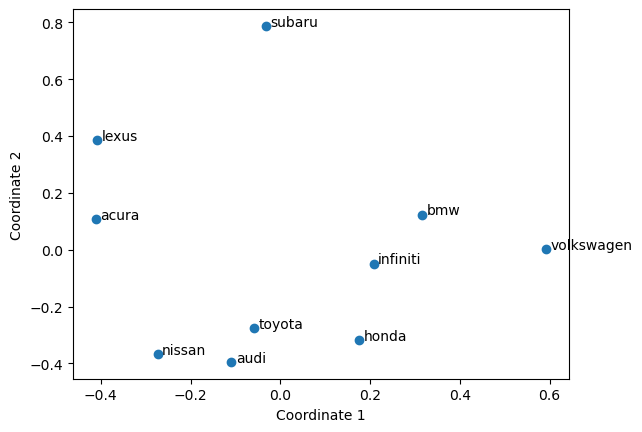

In [103]:
import matplotlib.pyplot as plt

#create scatterplot
plt.scatter(scaled_df[:,0], scaled_df[:,1])

#add axis labels
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')

#add lables to each point
for i, txt in enumerate(top_10_df['words']):
    plt.annotate(txt, (scaled_df[:,0][i]+.01, scaled_df[:,1][i]))

#display scatterplot
plt.show()

### Task F: Attributes

performance, luxury, price, engine, handling, interior, power, sport, hp, awd, rwd, fwd, speed, torque

In [27]:
#top_5_attr = ['sport','luxury','hybrid','speed','performance','price','engine','premium','cost','power','interior','hp','awd','rwd','fwd','torque']
top_5_attr = ['sport','luxury','hybrid','speed','performance','engine','premium','cost','power','interior']
top_5_attr_df = wnf_df[wnf_df['words'].isin(top_5_attr)]
top_5_attr_df = top_5_attr_df.rename(columns={0: 'frequency'})

top_5_attr_df

,words,frequency
18,performance,797
38,luxury,585
43,engine,517
62,interior,430
64,power,427
77,sport,381
130,speed,290
231,cost,196
374,premium,131
1429,hybrid,31


In [28]:

df_lift_attr = []

for index, brand1 in top_10_df.iterrows():
    for index, attr in top_5_attr_df.iterrows():
        df_lift_attr.append(lift_analysis(token_df['Mapped_words'],brand1['words'],attr['words'],word_distance))

In [29]:
lift_attr_np = np.reshape(df_lift_attr,(10,10))
lift_attr_df = pd.DataFrame(data= lift_attr_np)
for i in range(10):
    lift_attr_df = lift_attr_df.rename(columns = {i: top_10_df.iloc[i, 0]})
    lift_attr_df = lift_attr_df.rename(index = {i: top_5_attr_df.iloc[i, 0]})
lift_attr_df

,bmw,infiniti,acura,lexus,audi,honda,subaru,toyota,nissan,volkswagen
performance,0.7689,0.4153,0.0522,0.4897,0.6828,0.0567,0.5399,0.4132,1.5044,0.2613
luxury,0.7207,0.4734,0.0595,1.9441,0.2402,0.0538,0.4421,0.1570,1.1353,0.1654
engine,0.1310,0.5056,0.6226,0.9306,0.6723,0.4566,0.0600,0.3994,0.0000,0.8419
interior,0.1096,0.9708,0.6253,0.2235,1.3505,0.6192,0.0301,0.7132,0.6003,1.4092
power,0.1058,0.7385,0.6930,0.4411,1.6780,0.7744,0.0000,0.3763,0.4826,0.6798
sport,0.2725,0.3300,0.5601,0.6735,0.5369,0.4434,0.0416,0.4309,0.2763,1.9462
speed,1.2671,1.5486,0.3160,0.4490,0.5217,0.5067,0.0512,0.2273,0.2267,0.0000
cost,0.2459,0.5927,0.8165,0.5610,0.6708,0.6727,0.0000,0.2307,0.0000,1.4589
premium,0.9795,0.9532,0.6112,0.4755,0.6094,0.3415,0.2564,0.3793,0.1419,0.5996
hybrid,0.4888,0.9686,0.1370,1.5648,0.4976,0.0000,0.2442,0.0000,1.0813,0.0000


In [111]:
top_5_attr = ['sport','luxury','hybrid','speed','performance','engine','premium','cost','power','interior']
#Updated after change in data structure - USE THIS - >> performance, luxury, price, engine, handling, interior, power, sport, hp, awd, rwd, fwd, speed, torque